In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('../2. Data Preprocessing/processed_tmdb_data.csv')

print(df_train.columns)

Index(['budget', 'action', 'adventure', 'fantasy', 'science fiction', 'comedy',
       'crime', 'drama', 'mystery', 'thriller',
       ...
       'prosthetic makeup artist', 'special guest director',
       'lead set dresser', 'set dressing production assistant',
       'vfx production coordinator', 'radio play', 'tattoo designer',
       'tattooist', 'additional still photographer',
       'mechanical & creature designer'],
      dtype='object', length=574)


In [55]:
# Check the columns using dtypes
print(df_train.dtypes)
df_train.shape

budget                                                        int64
action                                                        int64
adventure                                                     int64
fantasy                                                       int64
science fiction                                               int64
comedy                                                        int64
crime                                                         int64
drama                                                         int64
mystery                                                       int64
thriller                                                      int64
romance                                                       int64
war                                                           int64
horror                                                        int64
animation_x                                                   int64
family                                          

(11664, 574)

In [112]:
# New df for non-text columns
df = df_train.loc[:, ["budget", "popularity", "production_companies", "production_countries", "weekday", "day", "month", "year", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]]
# total number of rows and columns
print(df.shape)
# Randomly sample 5 records with .sample(5)
df.sample(5)

(11664, 21)


budget  popularity  production_companies  production_countries  \
10247  7000000   14.672151                     2                     2   
5214         0   10.622000                     3                     1   
2554         0    5.131000                     4                     1   
2040         0    2.386000                     1                     1   
1238   1500000    3.914000                     2                     1   

       weekday   day  month    year  revenue  runtime     ...      vote_count  \
10247      5.0  12.0    8.0  1988.0  8373585    164.0     ...             201   
5214       5.0  12.0    1.0  1996.0        0     89.0     ...             324   
2554       4.0  22.0   12.0  1994.0        0     92.0     ...             408   
2040       1.0  11.0    2.0  2008.0        0     81.0     ...              40   
1238       5.0  17.0    7.0  2009.0        0     88.0     ...              73   

       weighted_rating  malecastsnum  femalecastsnum  unknowngendercastsnum  \
10247         7.000000          12.0             2.0                    1.0   
5214          6.989765           NaN             NaN                    NaN   
2554          7.001606           NaN             NaN                    NaN   
2040          7.000160           1.0             1.0                    7.0   
1238          6.995050           3.0             2.0                    3.0   

       totalcasts  malecrewsnum  femalecrewsnum  unknowngendercrewsnum  \
10247        15.0           4.0             2.0                    2.0   
5214          NaN           NaN             NaN                    NaN   
2554          NaN           NaN             NaN                    NaN   
2040          9.0           1.0             2.0                    0.0   
1238          8.0           1.0             0.0                    1.0   

       totalcrews  
10247         8.0  
5214          NaN  
2554          NaN  
2040          3.0  
1238          2.0  

[5 rows x 21 columns]

In [113]:
# Get summary statistics using .describe()
df.describe()
#df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].describe()

budget    popularity  production_companies  production_countries  \
count  1.166400e+04  11664.000000          11664.000000          11664.000000   
mean   1.434780e+07     11.696413              2.409894              1.283008   
std    3.015123e+07     21.467015              1.937179              0.743591   
min    0.000000e+00      0.000000              0.000000              0.000000   
25%    0.000000e+00      3.385750              1.000000              1.000000   
50%    5.500000e+03      5.710000              2.000000              1.000000   
75%    1.500000e+07     10.170750              3.000000              1.000000   
max    3.800000e+08    875.581305             26.000000             12.000000   

            weekday           day         month          year       revenue  \
count  11663.000000  11663.000000  11663.000000  11663.000000  1.166400e+04   
mean       4.197462     15.060705      6.783246   2001.229872  3.894777e+07   
std        1.497332      8.715747      3.433271     13.445944  1.152918e+08   
min        1.000000      1.000000      1.000000   1916.000000  0.000000e+00   
25%        3.000000      8.000000      4.000000   1995.000000  0.000000e+00   
50%        5.000000     15.000000      7.000000   2006.000000  0.000000e+00   
75%        5.000000     22.000000     10.000000   2011.000000  2.304593e+07   
max        7.000000     31.000000     12.000000   2017.000000  2.787965e+09   

            runtime     ...         vote_count  weighted_rating  malecastsnum  \
count  11651.000000     ...       11664.000000     11664.000000   6119.000000   
mean     100.921123     ...         392.373200         6.994895      6.417388   
std       25.264945     ...         893.269906         0.024943      4.754585   
min        0.000000     ...           0.000000         6.715498      0.000000   
25%       90.000000     ...          45.000000         6.992483      3.000000   
50%       99.000000     ...         102.000000         6.997454      6.000000   
75%      111.000000     ...         323.000000         6.999678      9.000000   
max      900.000000     ...       13752.000000         7.390359     68.000000   

       femalecastsnum  unknowngendercastsnum   totalcasts  malecrewsnum  \
count     6119.000000            6119.000000  6119.000000   6119.000000   
mean         3.375715               3.493054    13.286158      5.622814   
std          2.799069               4.567740     8.553640      5.049015   
min          0.000000               0.000000     0.000000      0.000000   
25%          1.000000               1.000000     8.000000      2.000000   
50%          3.000000               2.000000    12.000000      4.000000   
75%          5.000000               5.000000    17.000000      8.000000   
max         28.000000              58.000000   105.000000     67.000000   

       femalecrewsnum  unknowngendercrewsnum   totalcrews  
count     6119.000000            6119.000000  6119.000000  
mean         1.399575               7.499591    14.521981  
std          2.078236              12.004547    16.456451  
min          0.000000               0.000000     0.000000  
25%          0.000000               1.000000     4.000000  
50%          1.000000               3.000000    10.000000  
75%          2.000000               8.000000    18.000000  
max         31.000000             146.000000   193.000000  

[8 rows x 21 columns]

In [114]:
# Missing Values Summary
# total row counts
df['runtime'].value_counts()
print(df.count())

# NaN values count
print(df.isna().sum())

# Zero values count
print((df == 0).sum())

budget                   11664
popularity               11664
production_companies     11664
production_countries     11664
weekday                  11663
day                      11663
month                    11663
year                     11663
revenue                  11664
runtime                  11651
vote_average             11664
vote_count               11664
weighted_rating          11664
malecastsnum              6119
femalecastsnum            6119
unknowngendercastsnum     6119
totalcasts                6119
malecrewsnum              6119
femalecrewsnum            6119
unknowngendercrewsnum     6119
totalcrews                6119
dtype: int64
budget                      0
popularity                  0
production_companies        0
production_countries        0
weekday                     1
day                         1
month                       1
year                        1
revenue                     0
runtime                    13
vote_average                0
vote_c

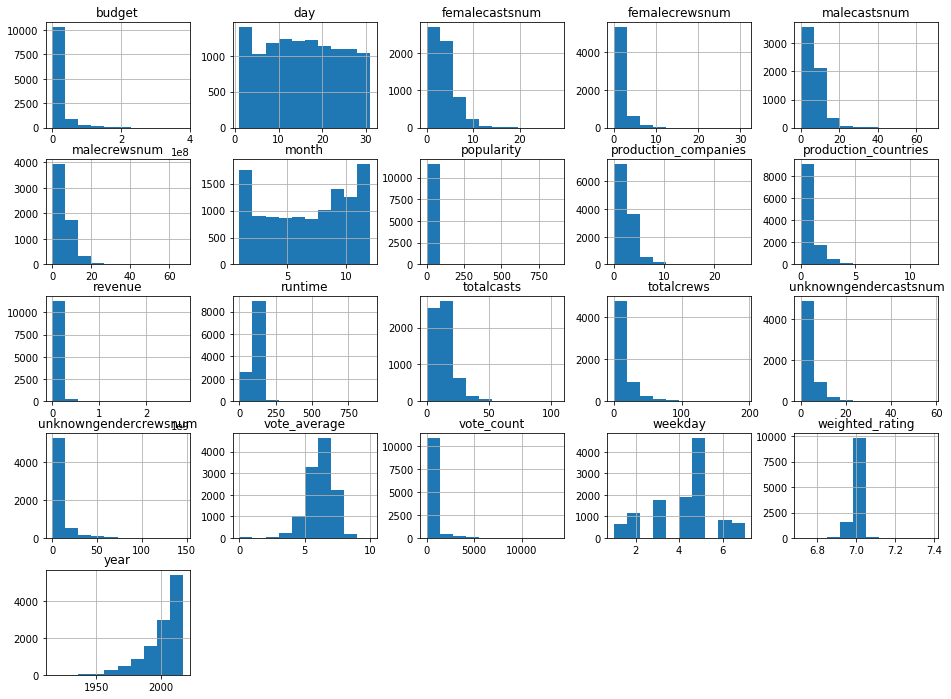

In [115]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df.hist()
plt.show()

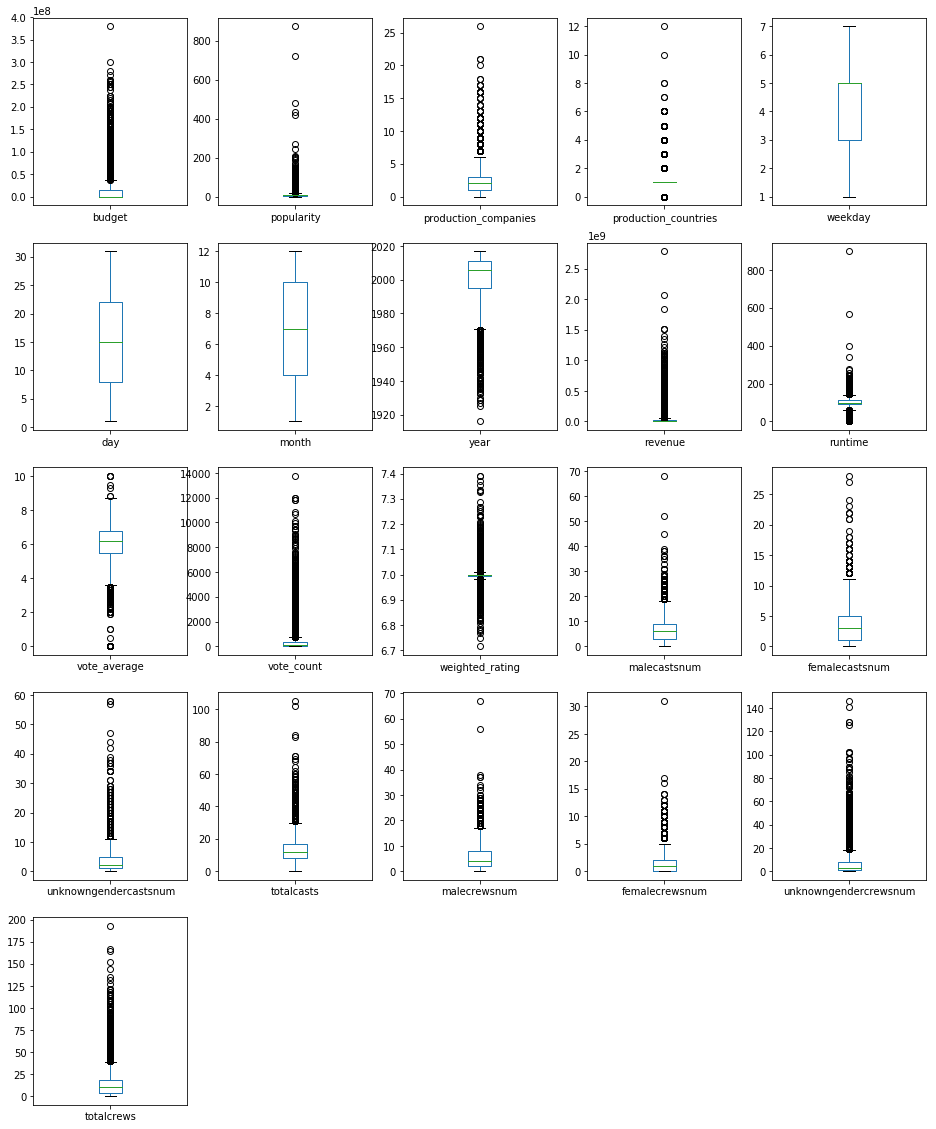

In [117]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,20]
# Plot boxplots for all attributes
df.plot(kind='box', subplots=True, layout=(5,5))
plt.show()

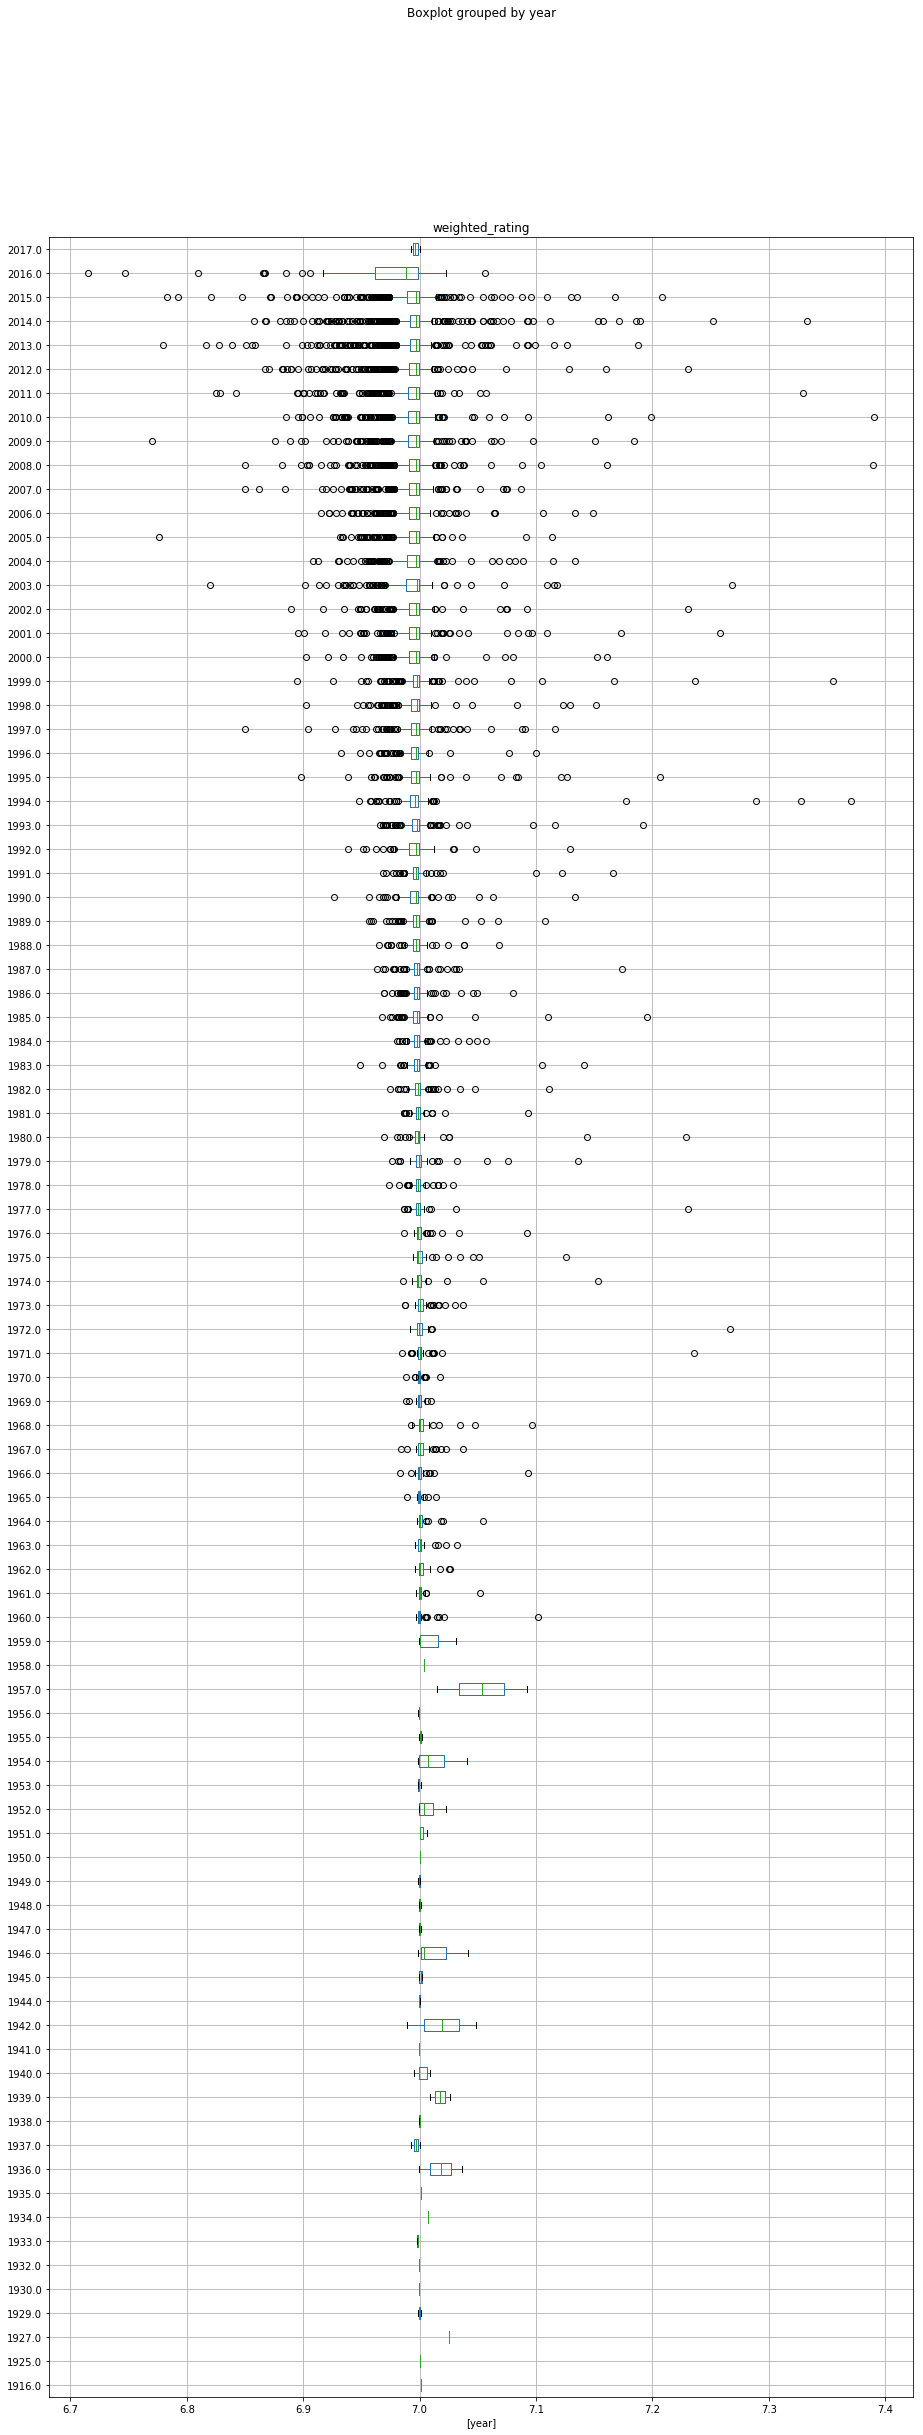

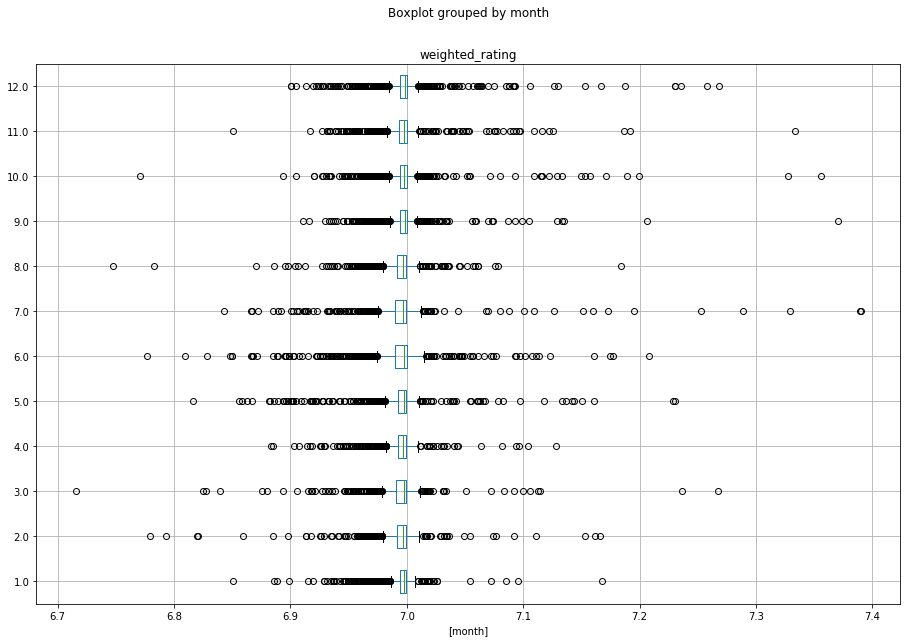

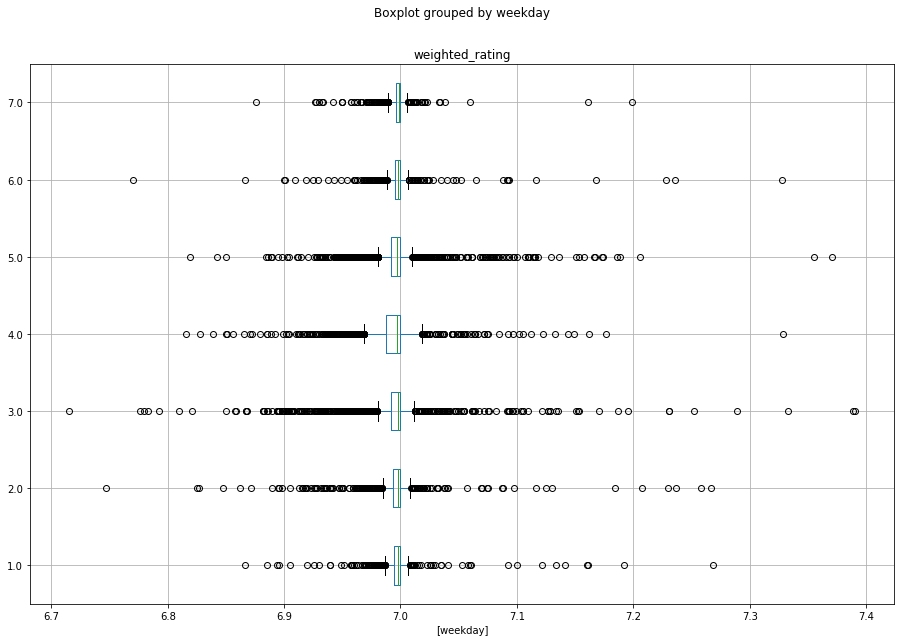

In [118]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 40]
# Plot a boxplot for a specific attributes
df[['weighted_rating', "year"]].boxplot(vert=False, by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['weighted_rating', "month"]].boxplot(vert=False, by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['weighted_rating',"weekday"]].boxplot(vert=False, by='weekday')
plt.show()

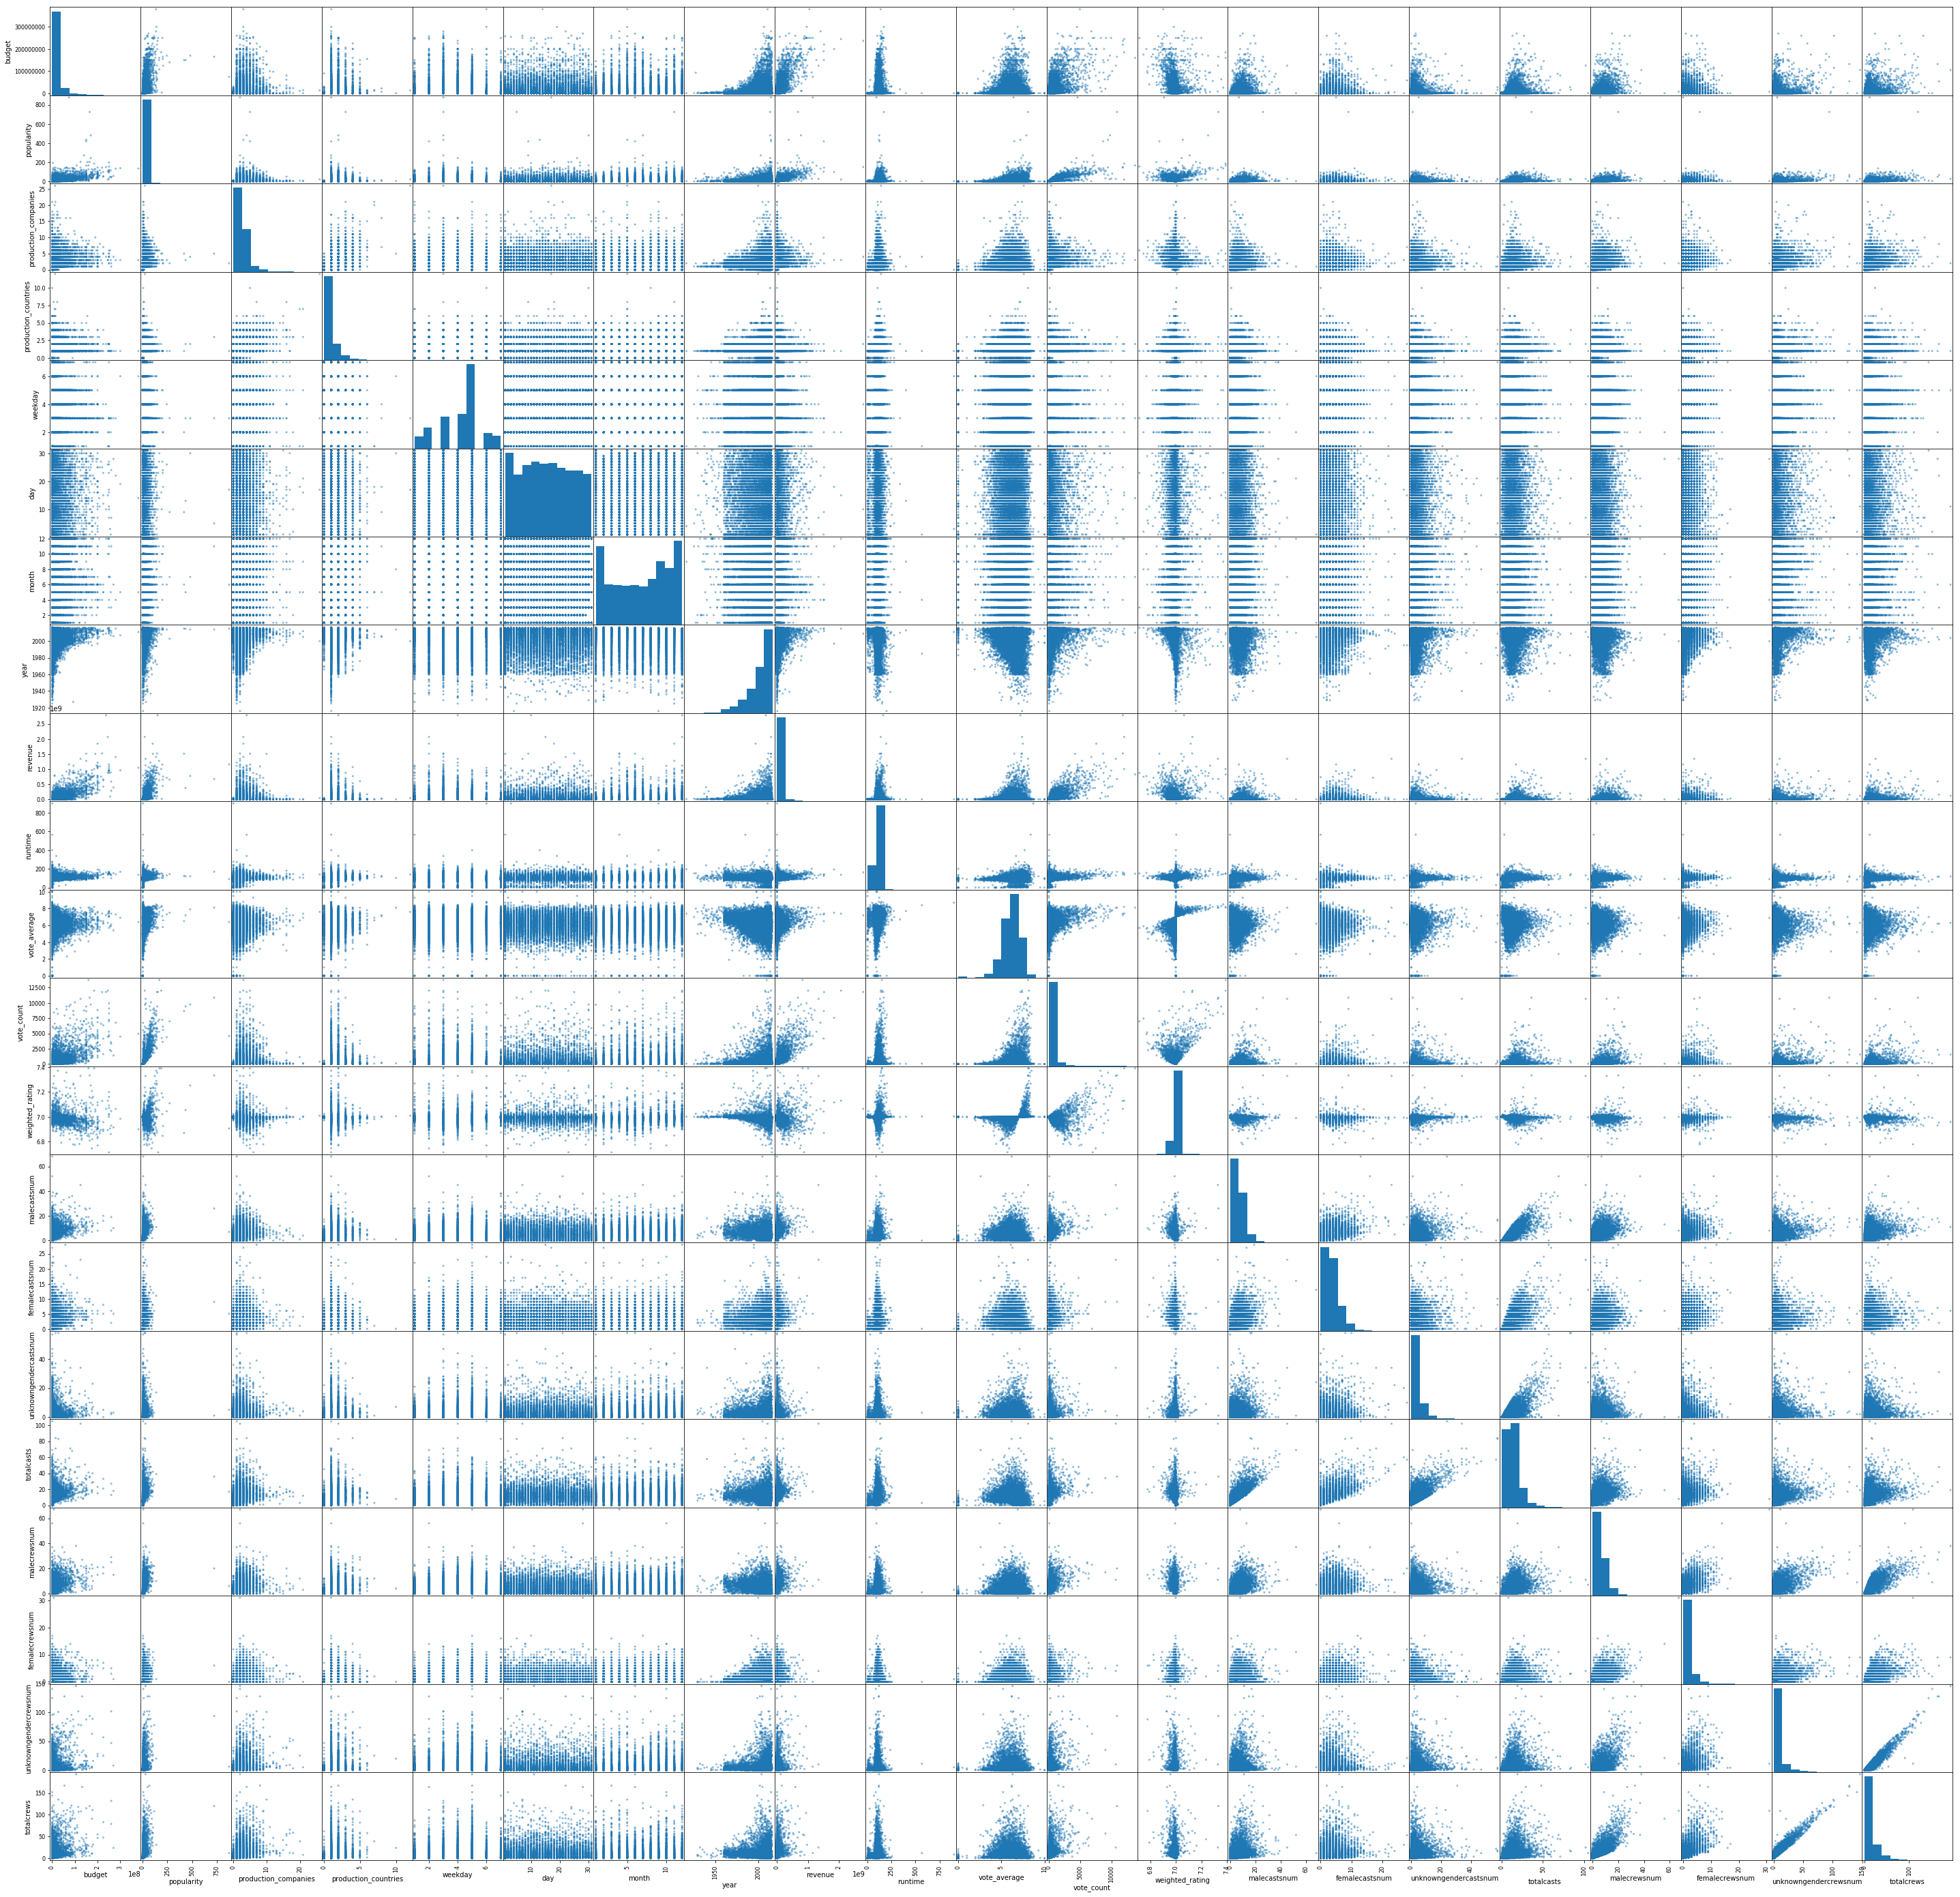

In [119]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [50,50]
# Plot scatter
pd.plotting.scatter_matrix(df)
plt.show()

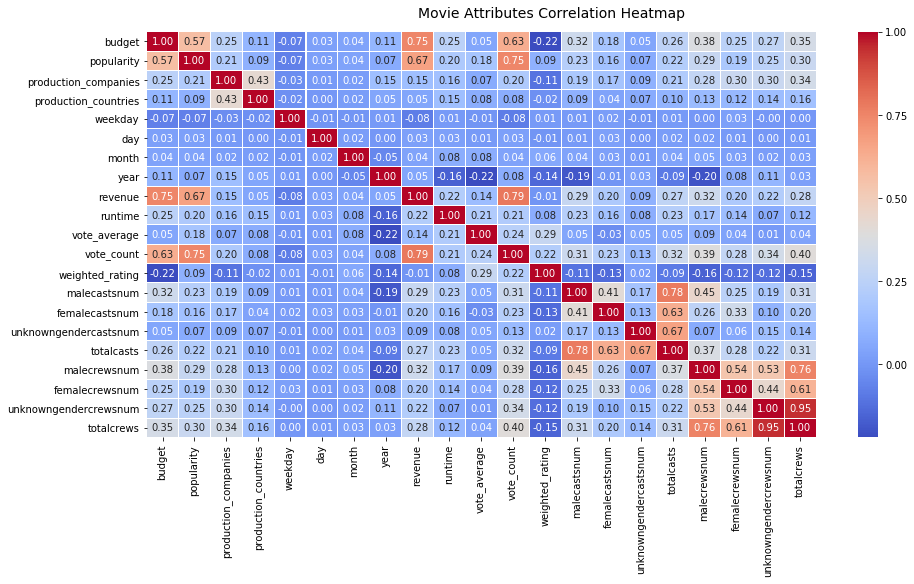

In [121]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [122]:
#descriptive statistics summary - sub in values to try
df['weighted_rating'].describe()

count    11664.000000
mean         6.994895
std          0.024943
min          6.715498
25%          6.992483
50%          6.997454
75%          6.999678
max          7.390359
Name: weighted_rating, dtype: float64

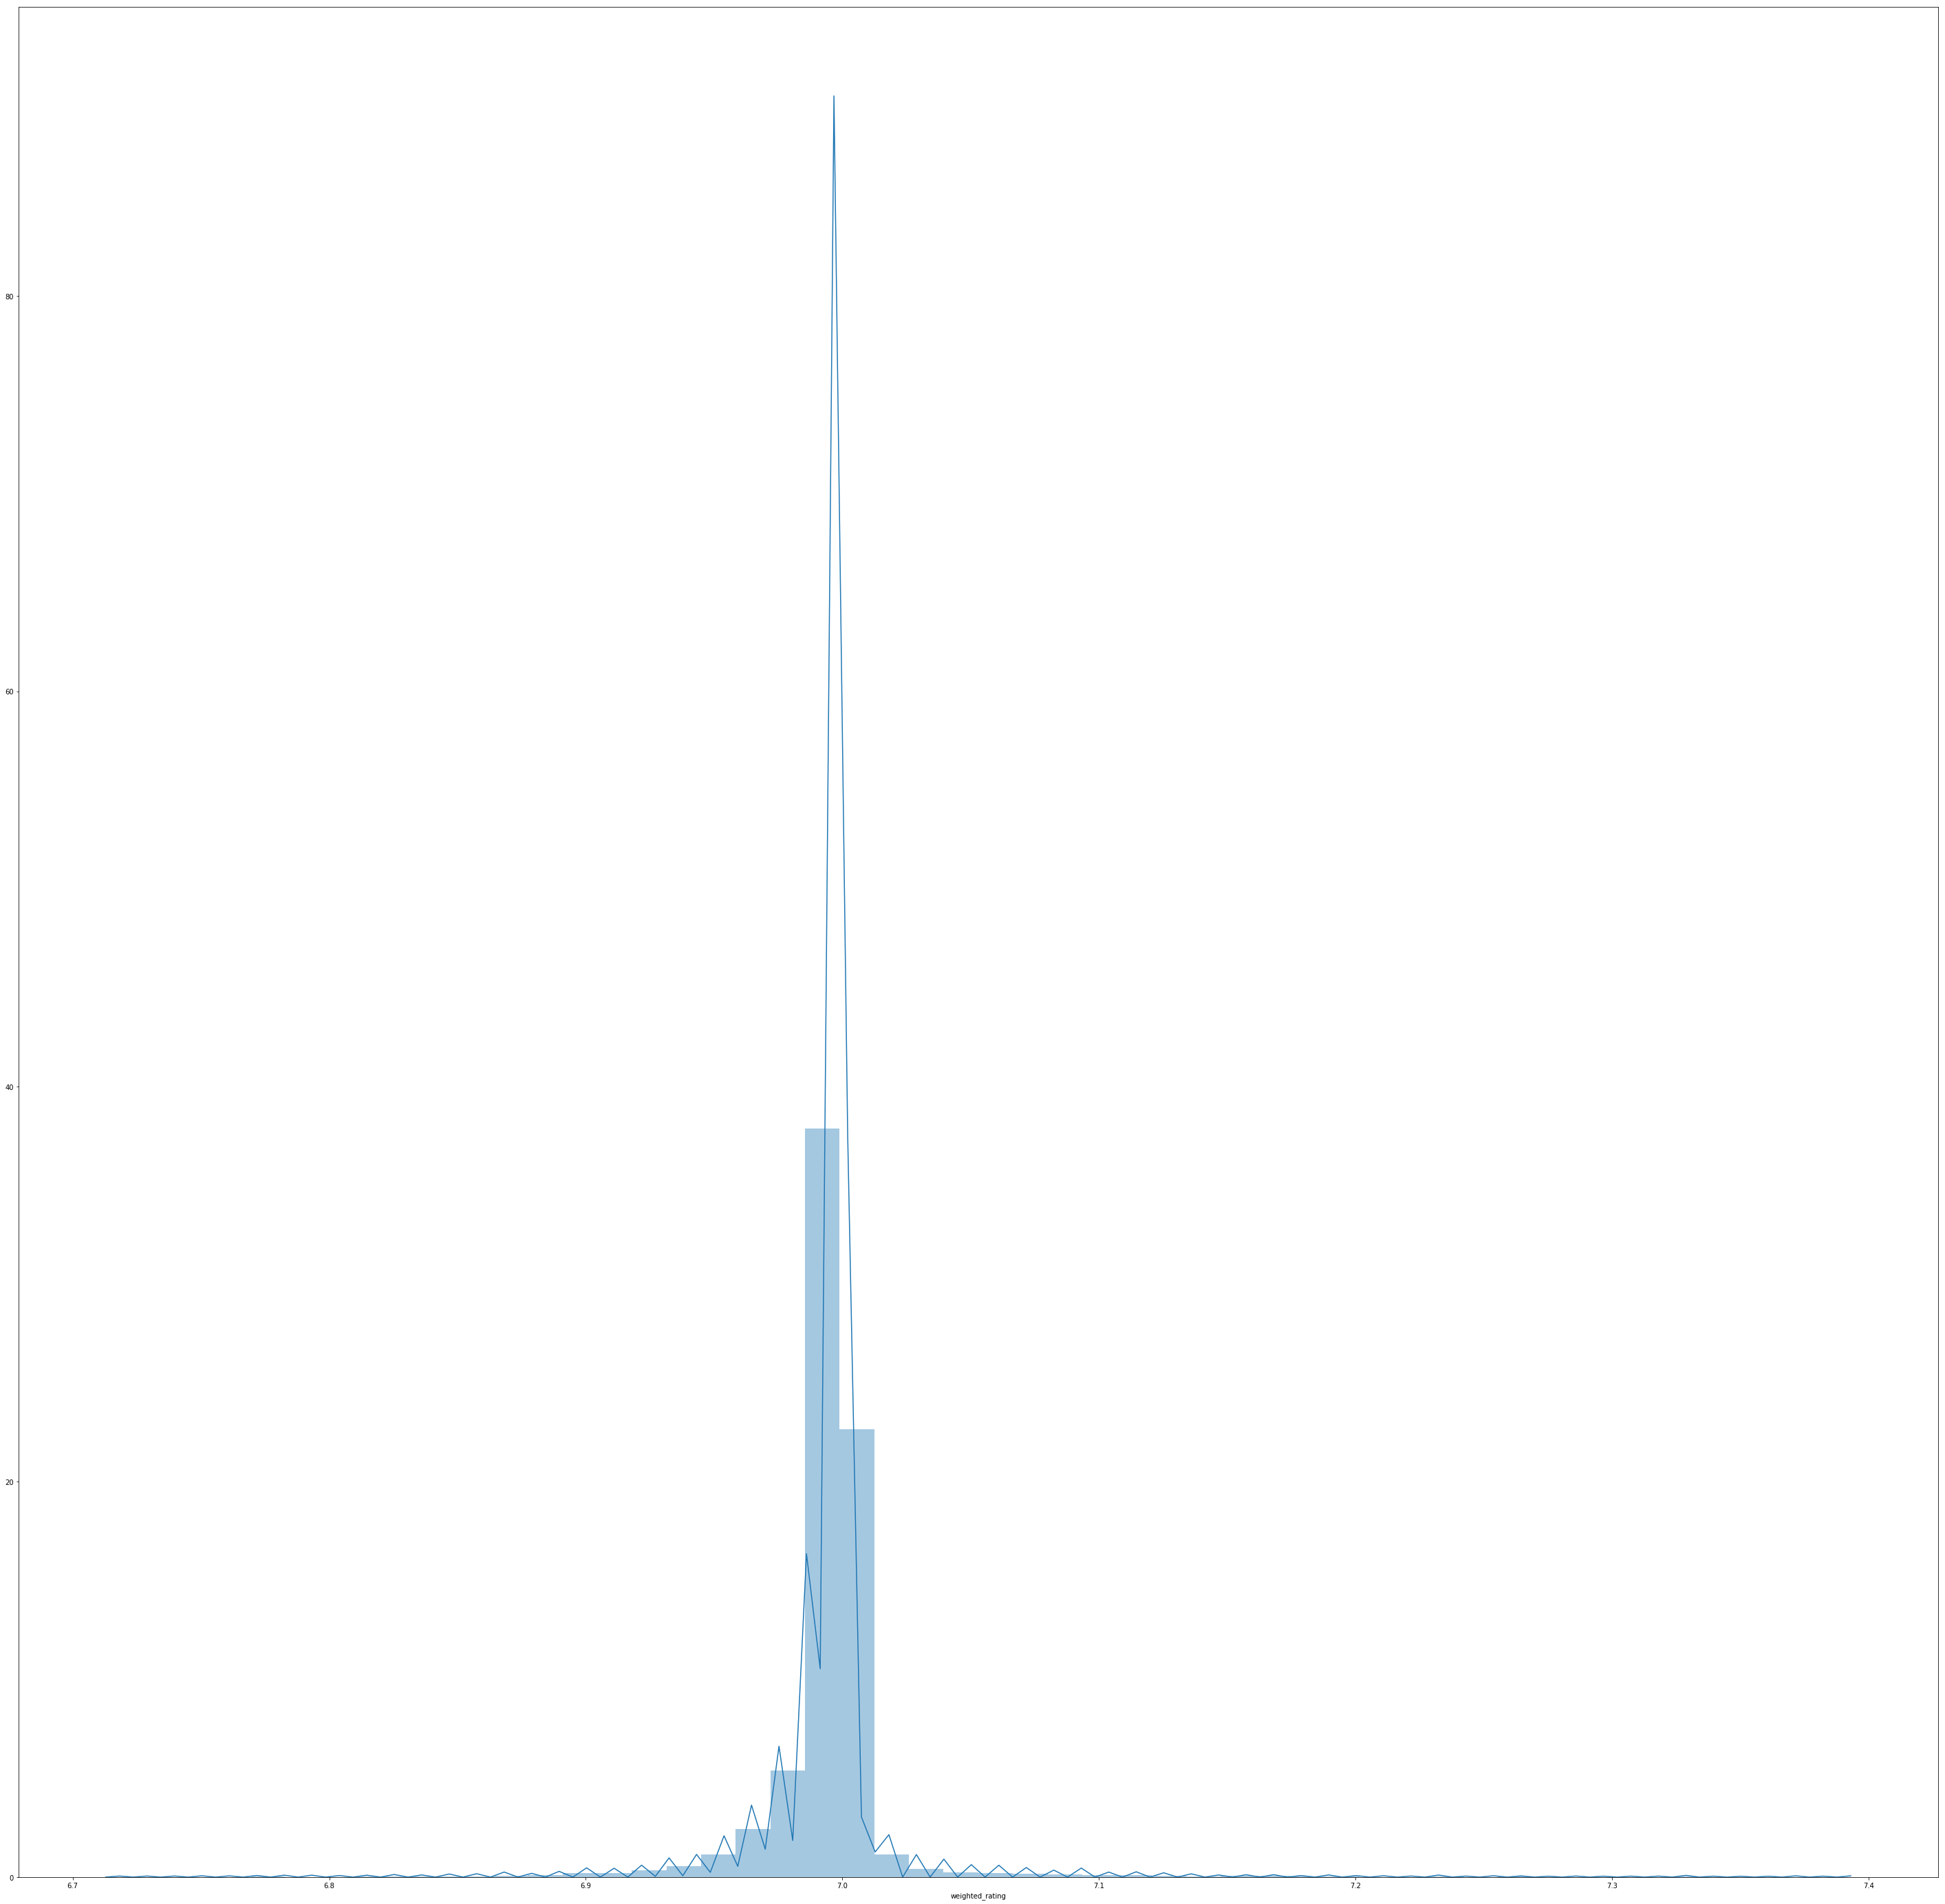

In [123]:
#histogram - sub in values to try
sns.distplot(df['weighted_rating']);

In [124]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df['weighted_rating'].skew())
print("Kurtosis: %f" % df['weighted_rating'].kurt()) # peak sharpness

Skewness: 2.779216
Kurtosis: 53.907067


In [129]:
# Outlier detection method (3 sd)
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [133]:
# Outlier detection
outlier_datapoints = detect_outlier(df_train['popularity'])
# print(outlier_datapoints)
print("popularity")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df_train['popularity']))

outlier_datapoints = detect_outlier(df_train['budget'])
# print(outlier_datapoints)
print("budget")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df_train['budget']))

outlier_datapoints = detect_outlier(df_train['revenue'])
# print(outlier_datapoints)
print("revenue")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df_train['revenue']))

outlier_datapoints = detect_outlier(df_train['runtime'])
# print(outlier_datapoints)
print("runtime")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df_train['runtime']))

outlier_datapoints = detect_outlier(df_train['weighted_rating'])
# print(outlier_datapoints)
print("weighted_rating")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df_train['weighted_rating']))

popularity
Number of Outliers: 2364
Number of Data Points: 11664
budget
Number of Outliers: 2647
Number of Data Points: 11664
revenue
Number of Outliers: 2870
Number of Data Points: 11664
runtime
Number of Outliers: 3186
Number of Data Points: 11664
weighted_rating
Number of Outliers: 3446
Number of Data Points: 11664
